<a href="https://colab.research.google.com/github/Baldros/Supervisioned-Learning/blob/main/Introdu%C3%A7%C3%A3oaoPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    Codigo construido para começar a estudar o processo de construção
    de redes neurais utilizando a biblioteca pytorch.

    O PyTorch é uma biblioteca de código aberto para aprendizado
    profundo (deep learning) em Python desenvolvida pelo Facebook
    AI Research (FAIR) e lançado em 2016. Ele oferece tensores dinâmicos,
    facilitando a construção e treinamento de redes neurais.






In [2]:
import torch
import numpy as np

# Introdução - tensores vs arrays(numpy):

    Tensores arrays (numpy) tem muito em comum.
    Ambas são representação de objetos matemáticos
    da algebra linear, ou seja, aqui estamos trabalhando
    com matrizes.

    Arrays numpy possuem algumas vantagens com relação
    ao desempenho na hora de se fazer calculos matriciais.
    Os tensores possuem algumas vantagens na hora de se
    fazer calculos matriciais para as redes neurais.

    Resumidamente, tensores e arrays tratam do mesmo
    objeto matemático, matrizes, porêm em contextos
    computacionais diferentes.

In [3]:
# Exemplo 1:
array = [1,2,3],[4,5,6]
tensor = torch.tensor(array)

In [4]:
# Exemplo 2:
np_array = np.array(array)
np_tensor = torch.from_numpy(np_array)

    Como arrays numpy, tensores são multidimensionais,
    representando uma coleção de elementos
    dispostos em uma grade com multiplas dimensões.

In [5]:
tensor.shape

torch.Size([2, 3])

In [6]:
tensor.dtype

torch.int64

In [7]:
tensor.device

device(type='cpu')

    Note que esse método um array numpy não possui,
    porque não faz muito sentido para o contexto do numpy
    saber esse tipo de coisa.
    
    Já no contexto de redes neurais, isso é um conhecimento
    interessante. Entende a diferença? Está nos detalhes.
    Você consegue fazer redes de aprendizado profundo com
    numpy, mas o pytorch já da mais informações de forma mais
    mastigada.

    Aprendizado profundo geralmente requer uma GPU, que,
    comparada a CPU pode oferecer recursos de computação
    paralela, tempos de treinamento mais rápidos e melhor
    desempenho.

In [8]:
print(tensor)
print(tensor.T)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


# Construindo uma Rede Neural:

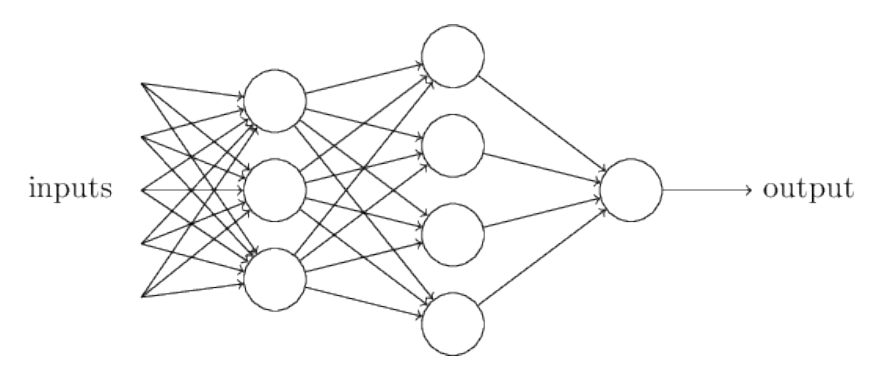

In [9]:
import torch.nn as nn

In [10]:
# Construindo a camada de entrada:
input_tensor = torch.tensor(
    [[0.3471,0.4547,0.-2356]]
)

    Aqui temos uma camada de entrada com três neurônios.

    A seguir, passamos esse input_tensor para um tipo especial de camada
    chamada camada linear. Uma camada linear pega um tensor de entrada,
    aplica uma função linear a ele e retorna uma saída.

In [11]:
# Definindo a camada linear:
linear_layer = nn.Linear(in_features=3,out_features=2)

Método Linear():

    O nn.Linear() aceita dois argumentos: in_features, que é o número
    de recursos em nossa entrada (três), e out_features, especificando o
    tamanho desejado do tensor de saída (neste caso, dois). A especificação
    correta de in_features garante que nossa camada linear possa receber o
    input_tensor.

Pesos e Viés:

    Um outro ponto importante de se comentar é como obter a informação
    de peso e viés da rede. Cada camada linear possui um conjunto de
    pesos e tendências associados a ela que podemos avaliar.

In [12]:
linear_layer.weight

Parameter containing:
tensor([[-0.5591, -0.5232, -0.4646],
        [-0.5477, -0.4785, -0.2418]], requires_grad=True)

In [13]:
linear_layer.bias

Parameter containing:
tensor([-0.0230,  0.1022], requires_grad=True)

    Por último, passamos input_tensor para linear_layer para gerar uma saída.
    Observe que a saída possui dois recursos ou neurônios, devido aos
    out_features especificados em nossa camada_linear.

In [14]:
# Gerando a saída:
output = linear_layer(input_tensor);output

tensor([[1094.0642,  569.4581]], grad_fn=<AddmmBackward0>)

**Qual operação nn.Linear() executa?**

    Quando input_tensor é passado para linear_layer, a operação linear
    executada é uma multiplicação da matriz de input_tensor pelos dos pesos,
    seguida pela adição do viés. Ou seja, se olhar uma rede:

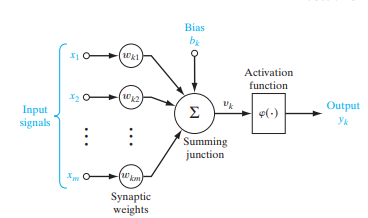

    Estamos executando essas operações:

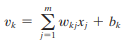
    
    Dito formalmente, para a entrada X, pesos W0 e polarização b0, a
    operação linear realizada é mostrada. O operador @ denota uma
    multiplicação de matrizes. Não realizaremos esse cálculo manualmente,
    pois nn.Linear() cuida disso. Inicialmente, quando chamamos nn.Linear(),
    os pesos e as tendências são inicializados aleatoriamente, portanto
    ainda não são úteis. Posteriormente no curso, ajustaremos esses pesos
    e viéses para que o resultado da nossa operação linear seja significativo.


In [15]:
array = np.array([[0.3471,0.4547,0.-2356]])

**nn.Sequential():**

    Até agora trabalhamos com uma camada de entrada e uma camada linear.
    E se quiséssemos empilhar várias camadas? Conheça nn.Sequential(),
    um contêiner PyTorch que nos permite empilhar vários módulos de rede
    neural em sequência. O código fornecido mostra três camadas lineares
    empilhadas em nn.Sequential(). Este modelo recebe a entrada, passa-a
    para cada camada linear em sequência e retorna a saída. A primeira
    camada recebe entrada com dez recursos e gera um tensor com 18 recursos.
    A segunda camada recebe uma entrada de tamanho 18 (o tamanho de saída da
    primeira camada) e gera um tensor de tamanho 20. A camada final recebe a
    entrada com o tamanho de saída da segunda camada (20) e produz um tensor
    de tamanho cinco.

In [16]:
model = nn.Sequential(
    nn.Linear(10,18),
    nn.Linear(18,20),
    nn.Linear(20,5)
)

In [17]:
print(input_tensor)

tensor([[ 3.4710e-01,  4.5470e-01, -2.3560e+03]])


# Função de Ativação:

    Função de ativação ou função deslinearizadora, são funções que acrescentam
    uma não linearidade ao aprendizado da rede. Esta não linearidade concede
    às redes a capacidade de aprender interações mais complexas entre as
    entradas X e os alvos y do que apenas relações lineares. A saída não
    será mais uma função linear da entrada. Chamaremos a saída da última
    camada linear de saída de "pré-ativação", que passaremos para funções
    de ativação para obter a saída transformada.

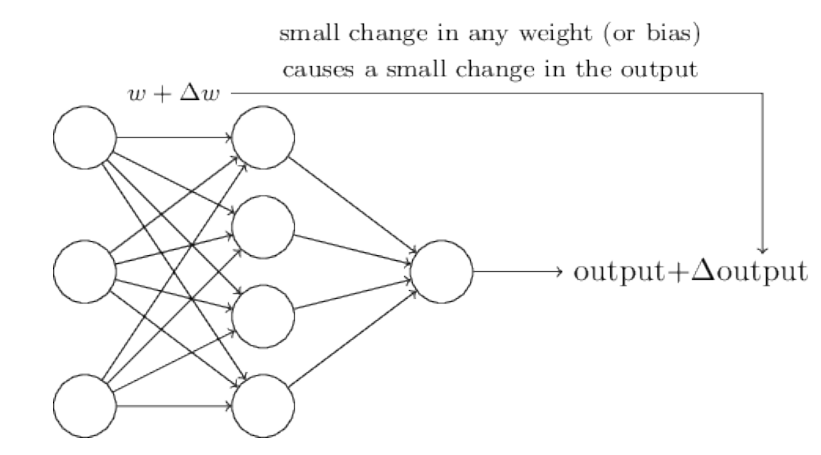    

    Onde temos que:

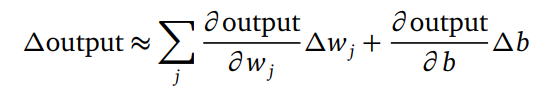

**Função Sigmoid**

    Existem alguns tipos de funções de ativação, a que o curso iniciará
    abordando é a sigmoid, que é muito utilizada para classificação binária.

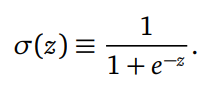


    Onde z é a nossa camanda linear.

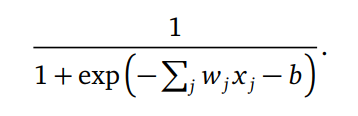

In [18]:
# Criando a função sigmoid:
input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor); output

tensor([[0.9975]])

    A função de ativação é a ultima etapa do
    processo de predição de uma rede neural.

    Note que um MLP de uma única entrada e
    camada, nada com função de ativação sigmoid,
    nada mais é do que uma regressão logistica.

In [22]:
model = nn.Sequential(
    nn.Linear(6,4), # Primeira Camada Linear;
    nn.Linear(4,1), # Segunda Camada Linear;
    nn.Sigmoid() # Função de Ativação.
)

    Graficamente falando, a ideia da Sigmoid é transformar isso:
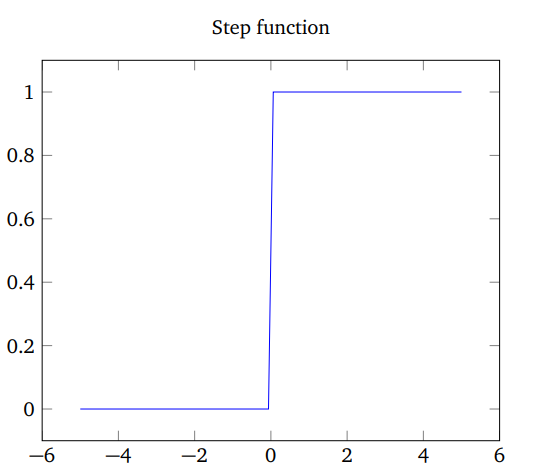

    Nisso:

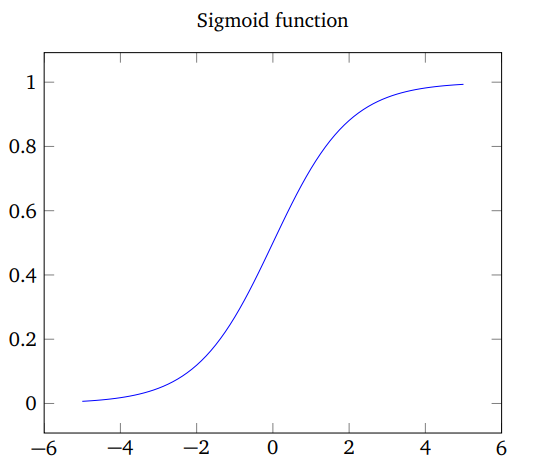


**softmax**

    Usamos sigmóide para classificação binária. Para classificação
    multiclasse, envolvendo mais de dois rótulos de classe, usamos
    softmax, outra função de ativação popular. A ideia da Softmax
    é parecida com a da Sigmoid, porém, para ser aplicada em tipos
    de classificação multiclasses, a matemática por trás precisa ser
    um pouco diferente:

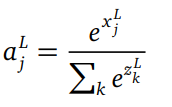    

    Certamente não é óbvio por que gostaríamos de usar esta função.
    E também não é óbvio que isso nos ajudará a resolver o problema
    da desaceleração do aprendizado. A razão é que as ativações de
    saída são garantido que sempre somará 1.

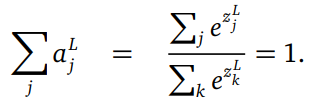

    Fica ai provar isso, a título de exercício.

In [24]:
# Criando as entradas:
input_tensor = torch.tensor(
    [[4.3,6.1,2.3]]
)

# Aplicando o softmax ao longo da ultima dimensão:
probabilidades = nn.Softmax(dim=-1)
output_tensor = probabilidades(input_tensor)

# Printando saídas:
print(output_tensor)

tensor([[0.1392, 0.8420, 0.0188]])


Nota:

    dim = -1 indica que softmax é aplicado à última dimensão de
    input_tensor, que geralmente é o que fazemos. Semelhante ao
    sigmóide, softmax pode ser a última camada em nn.Sequential.

In [ ]:
f